# hw06

## Metadata

```{yaml}
Name:    hw06
URL:     https://github.com/tslever/DS5100-2022-08-tsl2b/blob/main/lessons/M06/hw06.ipynb
Course:  DS 5100
Term:    Fall 2022 Online
Module:  M06: Getting Started with pandas
Topic:   Myocardial Infarction Analytics with pandas
Author:  Tom Lever
Net ID:  tsl2b
Created: 27 September 2022
Updated: 28 September 2022
```

## Overview

In this homework, you will be working the Myocardial Infarction (MI) Complications Data Set housed at UCI.

A myocardial infarction is commonly called a heart attack.

You may read about the data set in the [Data Description File (DDF)](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#).

You will work with some of the columns (aka features).

A subset of these could be predictors in a ML model, while others could be outcome variables.

The section **Attribute Information** in the Data Description File provides details.


## Setting Up

In [1]:
import numpy as np
import pandas as pd

## Preparing the Data

Read in the data set from the UCI Machine Learning Repository.

Use pandas's `read_csv` function, giving the path to the data set as an argument.

There is no header in this data, so pass a second argument, `header = None`.

In [2]:
path_to_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data"

## Tasks

### Task 1

(1 point)

Import the data into a data frame and then print the number of records in the dataset.

In [3]:
df = pd.read_csv(path_to_data, header = None)
print(len(df))
print(df.shape[0])

1700
1700


### Task 2

(1 point)

Show the first three records in the data set.

In [4]:
df.head(n = 3)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0


## Working with Age

The second column contains patient age.

If your data frame is named `df`, you can reference the column with `df[1]`.

Generally the field names will be strings and you can use `df['age']` to access field `age`.

### Task 3

(1 point)

One complication: missing values are filled with `?`, which will cause problems (e.g., stats can't be computed easily).

Count the number of records in `df[1]` containing `?`.

In [5]:
def determine_number_of_unknown_ages(ages):
    ages_that_are_question_mark = ages[ages == '?']
    ages_that_are_NaN = ages[ages.isna()]
    print("Number of ages that are '?': " + str(len(ages_that_are_question_mark)))
    print("Number of ages that are NaN: " + str(len(ages_that_are_NaN)))
    
ages = df[1]
determine_number_of_unknown_ages(ages)

Number of ages that are '?': 8
Number of ages that are NaN: 0


### Task 4 

(1 point)

Replace `?` with `np.nan` in the age column.

In [6]:
ages.replace(to_replace = '?', value = np.nan, inplace = True)

### Task 5 

(1 point)

Print the number of records containing `np.nan` in the column `df[1]` of your data frame.

In [7]:
determine_number_of_unknown_ages(ages)

Number of ages that are '?': 0
Number of ages that are NaN: 8


Other complications: The age data are saved as strings, and there are null values.

To convert the ages to floats, we can use `apply` with a lambda function.

If the type is string, we cast to float. If the type is null, we leave things alone.

`isinstance(x, str)` checks if `x` is a string, returning a boolean.

Review this code for understanding:

In [8]:
ages = ages.apply(lambda x: float(x) if isinstance(x, str) else x)
df[1] = ages # As apply iterates over rows, it returns a new series

### Task 6

(1 point)

Run the lambda function above. Then show the data type of `age` is no longer string type.

In [9]:
ages.dtype

dtype('float64')

### Task 7

(1 point)

Compute the median age.

In [10]:
print(ages.median())
print(ages.median(skipna = False))

63.0
nan


## Working with Gender

The third column contains patient gender.

Again, since indexing starts at zero, you'll reference `df[2]`.

### Task 8

(1 point)

Print the frequency AND percentage of each gender.

Hint: The function you'll use to compute frequencies will take an argument to compute normalized frequencies, which may be converted to percentages.

In [11]:
genders = df[2]
genders.replace(0, 'female', inplace = True)
genders.replace(1, 'male', inplace = True)
frequencies_and_percentages = pd.DataFrame({'frequency': genders.value_counts(), 'percentage': genders.value_counts(normalize = True) * 100})
frequencies_and_percentages

,frequency,percentage
male,1065,62.647059
female,635,37.352941


## Working with Essential Hypertension

Reference this column with `df[8]`.

### Task 9

(1 point)

Enter the most frequent value.

In [12]:
values_of_essential_hypertension = df[8]
print('Most frequent value: ' + str(values_of_essential_hypertension.mode()[0]))
print(values_of_essential_hypertension.value_counts())

Most frequent value: 2
2    880
0    605
3    195
1     11
?      9
Name: 8, dtype: int64


## Working with Atrial Fibrillation (AFIB)

Reference this column with `df[112]`.

AFIB is one of the complications and outcomes of myocardial infarcation.

### Task 10

(1 point)

Print the number of AFIB cases.

Note that 1 means there is a case.

In [13]:
values_of_atrial_fibrillation = df[112]
mask_that_reveals_cases = values_of_atrial_fibrillation == 1
cases = values_of_atrial_fibrillation[mask_that_reveals_cases]
len(cases)

170

### Task 11

(1 point)

Construct a new dataframe `df2` containing only the columns for age and AFIB.

Recall that age is in `df[1]` and AFIB is in `df[112]`.

Print the shape of this dataframe.

Hint: you can pass a list of column names to the data-frame indexer to get a data frame with a subset of columns.

In [14]:
df2 = df[[1, 112]].copy()
print(df2.shape)
df2

(1700, 2)


,1,112
0,77.0,0
1,55.0,0
2,52.0,0
3,68.0,0
4,60.0,0
...,...,...
1695,77.0,0
1696,70.0,0
1697,55.0,0
1698,79.0,0


## Plotting

We are going to plot age and AFIB, so renaming the columns to strings will make our visualization more readable.

You can rename columns using the data-frame `rename` method, which takes a dictionary as an argument of the form:

```python
{
    current_column_name_1: new_column_name_1,
    ...
    current_column_name_N: new_column_name_N
}
```

Rename column `1` to `age` and `2` to `AFIB` for `df2`.

In [15]:
df2 = df2.rename({1: 'age', 112: 'AFIB'}, axis = 1)
df2['AFIB'].replace(0, 'non-case', inplace = True)
df2['AFIB'].replace(1, 'case', inplace = True)
df2

,age,AFIB
0,77.0,non-case
1,55.0,non-case
2,52.0,non-case
3,68.0,non-case
4,60.0,non-case
...,...,...
1695,77.0,non-case
1696,70.0,non-case
1697,55.0,non-case
1698,79.0,non-case


### Task 12

(1 point)

Display a boxplot with AFIB on the `x` axis and age on the `y` axis 

Use the `boxplot()` function from the `seaborn` package for this.
            
Here is the [documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html), but all you need to do is this:

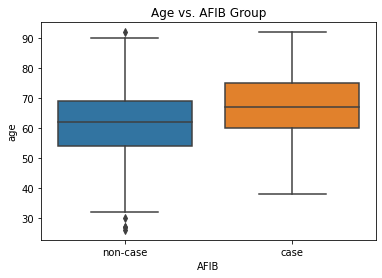

In [16]:
import matplotlib.pyplot as plt
from seaborn import boxplot
the_boxplot = boxplot(y = df2['age'], x = df2['AFIB'])
the_boxplot.set_title('Age vs. AFIB Group')
plt.show()

Groups of people with atrial fibrillation have approximately the same maximum age and interquartile range of ages at which heart attack occurs. The minimum, first quartile, median, and third quartile ages are less for the group of people without atrial fibrillation.